## Keara Hayes, Atticus Chong, Zachary Malzahn, Evelyn Fuhrman

In [1]:
import numpy as np
from numpy.linalg import norm
import math
import matplotlib.pyplot as plt

1) From ODE.py

In [2]:
alpha = 4*np.pi**2

In [3]:
def fEuler(f,t,z,h,args=()):
    """    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (scalar)
            current time
            
        z (array-like)
            function value
            
        h (scalar)
            step size
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
    
    # The following trick allows us to pass additional parameters to f
    # first we make sure that args is of type tuple; if not, we make it into
    # that form
    if not isinstance(args,tuple):
        args = (args,)
    
    # when we call f, we use *args to pass it as a list of parameters.
    # for example, if elsewhere we define f like
    # def f(t,z,x,y):
    #    ...
    # then we would call this routine as
    # znew = fEuler(f,t,z,h,args=(x,y))
    #
    return z + h*f(t,z,*args)

In [4]:
def rk2(f,t,z,h,args=()):
    """
    <Description of routine goes here: what it does, how it's called>
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (scalar)
            final time (which we're iterating to)
            
        z (array-like)
            function value
            
        h (scalar)
            step size
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """

    if not isinstance(args,tuple):
        args = (args,)
    
    
    zp = z + (h/2)*f(t,z,*args)
    
    return z + h*f(t + h/2, zp, *args)

In [5]:


def rk4(f,t,z,h,args=()):
    """
    <Description of routine goes here: what it does, how it's called>
    
    Arguments
        f(t,z,...)
            function that contains the RHS of the equation dz/dt = f(t,z,...)
    
        t (scalar)
            final time (which we're iterating to)
            
        z (array-like)
            function value
            
        h (scalar)
            step size
    
        args (tuple, optional)
            additional arguments to pass to f
    
    Returns
        znew = z(t+h)
    """
   
    if not isinstance(args,tuple):
        args = (args,)

    k1 = f(t, z, *args)

    k2 = f(t + h/2, z + (h/2)*k1, *args)

    k3 = f(t + h/2, z + (h/2)*k2, *args)

    k4 = f(t + h, z + h*k3, *args)
    
    return z + (h/6)*(k1 + 2*k2 + 2*k3 + k4)



2) from kepler.py

In [6]:
# use this to identify methods
integration_methods = {
    'Euler':fEuler,
    'RK2':rk2,
    'RK4':rk4
    }

In [7]:
# energies
def kinetic_energy(v):
    """
    Returns kinetic energy per unit mass: KE(v) = 0.5 v*v.
    
    Arguments
        v (array-like)
            velocity vector
    """
    return 0.5*np.linalg.norm(v)**2

def potential_energy(r,m):
    """
    Returns potential energy per unit mass: PE(x, m) = -m/norm(r)

    Arguments
        x (array-like)
            position vector
        m (scalar)
            total mass in normalized units
    """
    # the norm function returns the length of the vector
#     r = norm(x)
    return -m/np.linalg.norm(r)

def total_energy(z,m):
    """
    Returns energy per unit mass: E(z,m) = KE(v) + PE(x,m)

    Arguments
        x (array-like)
            position array
            
        z (array-like)
            function value
            
        m (scalar)
            total mass in normalized units
    """
    # to break z into position, velocity vectors, we use array slices:
    # here z[n:m] means take elements of z with indices n <= j < m
    r = z[0:2]  # start with index 0 and take two indices: 0 and 1
    v = z[2:4]  # start with index 2 and take two indices: 2 and 3

    # replace the following two lines
    return kinetic_energy(v) + potential_energy(r,m)

In [8]:
def derivs(t,z,m):
    """
    Computes derivatives of position and velocity for Kepler's problem 
    
    Arguments
        t (scalar)
            final time (which we're iterating to)
            
        z (array-like)
            function value at supplied t, z, etc
            
        m (scalar)
            total mass in normalized units
            
    Returns
        numpy array dzdt with components [ dx/dt, dy/dt, dv_x/dt, dv_y/dt ]
    """

    r = z[0:2]
    v = z[2:4]
    rabs = np.linalg.norm(r)

    drdt = v
    
    # scaled to the solar system
    dvdt = -2*np.pi*m*r/(rabs**3)
    
    # join the arrays
    dzdt = np.concatenate((drdt,dvdt))
    return dzdt

3)

In [9]:
def integrate_orbit(z0,m,tend,h,method='RK4'):
    """
    Integrates orbit starting from an initial position and velocity from t = 0 
    to t = tend.
    
    Arguments:
        z0 (scalar)
            initial function value
        m (scalar)
            mass of star
    
        tend (scalar)
            final timestep
    
        h (scalar)
            incrementing stepsize
    
        method ('Euler', 'RK2', or 'RK4')
            identifies which stepper routine to use (default: 'RK4')
    Returns
        ts, Xs, Ys, KEs, PEs, TEs := arrays of time, x postions, y positions, 
        and energies (kin., pot., total) 
    """

    # set the initial time and phase space array
    t = 0.0
    z = z0

    # expected number of steps
    Nsteps = int(tend/h)+1

    # arrays holding t, x, y, kinetic energy, potential energy, and total energy
    ts = np.zeros(Nsteps) # time
    Xs = np.zeros(Nsteps) # x-axis position
    Ys = np.zeros(Nsteps) # y-axis position
    KEs = np.zeros(Nsteps) # kinetic energy
    PEs = np.zeros(Nsteps) # potential energy
    TEs = np.zeros(Nsteps) # total energy

    # store the initial point
    ts[0] = t
    Xs[0] = z[0]
    Ys[0] = z[1]
    KEs[0]=(1/2)*m*np.linalg.norm(z[2:4])**2
    PEs[0]=-m/np.linalg.norm(z[0:2])
    TEs[0]=KEs[0]+PEs[0]

    # select the stepping method
    advance_one_step = integration_methods[method]
    # run through the steps

    for step in range(1,Nsteps):
        z = advance_one_step(derivs,t,z,h,args=m)
        t += h
        # store values
        ts[step] = t
        dzdt = derivs(t,z,m)
        v = dzdt[0:2]  # define velocity at this step
        acc = dzdt[2:4] # define acceleration at this step
        # fill in with assignments for Xs, Ys, KEs, PEs, TEs
        Xs[step] = z[0]
        Ys[step] = z[1]
        KEs[step] = kinetic_energy(v)
        PEs[step] = potential_energy(z[0:2],m)
        TEs[step] = total_energy(z,m)
    return ts, Xs, Ys, KEs, PEs, TEs
    
def set_initial_conditions(a, m, e):
    """
    set the initial conditions for the orbit.  The orientation of the orbit is 
    chosen so that y0 = 0.0 and vx0 = 0.0.
    
    Arguments
        a (scalar)
            semi-major axis in AU
        m (scalar)
            total mass in Msun
        e (scalar)
            eccentricity ( x0 = (1+e)*a )
    
    Returns:
    [x0, y0, vx0, vy0], eps0, Tperiod := initial position and velocity, energy, 
        and period
    """
    eps0=((a/m)*2)**-1
    T=(np.pi/math.sqrt(2))*m*(eps0**(-3/2))
    x0=(1+e)*a
    y0=0
    vx0=0
    vy0=math.sqrt(2*eps0+2*m/x0)
    r_init=np.array([x0,y0])
    v_init=np.array([vx0,vy0])
    z_init=np.append(r_init,v_init)
    return z_init,eps0,T

4) $$\hphantom{0}$$

In [10]:
z_init,eps0,T=set_initial_conditions(1,1,0.5)
h_0=0.1*T
h_arr=h_0/2**np.arange(0,11)

output_list=[]

for i,h in enumerate(h_arr):
    output_list.append(integrate_orbit(z_init, 1, tend = 3*T, h = h, method = 'RK4'))
    #ts, Xs, Ys, KEs, PEs, TEs
#     (z0,m,tend,h,method='RK4')

In [11]:
e_err=[]
for i in range(11):   
    e_err.append(output_list[i][5][-1]/output_list[i][5][0])

In [12]:
e_err

[2.296651065519866,
 38.85132704170498,
 34.11767229875713,
 1.9041893307162998,
 1.2053790789231609,
 1.1912322163433107,
 1.1908043018043637,
 1.1907915854141784,
 1.1907912299553736,
 1.190791221476005,
 1.1907912213747271]

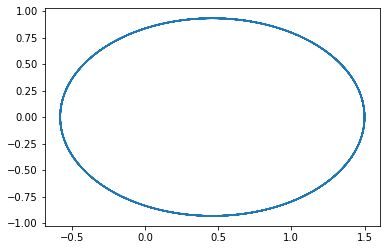

In [13]:
plt.plot(output_list[10][1],output_list[10][2])

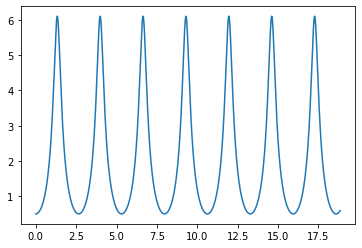

In [19]:
plt.plot(output_list[10][0],output_list[10][5])

5)

In [15]:
axis[0,0].plot(x00,y00)
axis[0,0].set_title("Trajectory Found with Forward Euler (Smallest h Value)")

axis[1,0].plot(x10,y10)
axis[1,0].set_title("Trajectory Found with Second-Order Runge-Kutta (Smallest h Value)")

axis[2,0].plot(x20,y20)
axis[2,0].set_title("Trajectory Found with Fourth-Order Runge-Kutta (Smallest h Value)")

axis[0,1].plot(x01,y1)
axis[0,1].set_title("Trajectory Found with Forward Euler (Largest h Value)")

axis[1,1].plot(x2,y2)
axis[1,1].set_title("Trajectory Found with Second-Order Runge-Kutta (Largest h Value)")

axis[2,2].plot(x3,y3)
axis[2,2].set_title("Trajectory Found with Fourth-Order Runge-Kutta (Largest h Value)")

NameError: name 'axis' is not defined

In [ ]:
def energy_plot(KE, PE, t):
    
    """
    Creates  energy of the orbiting particle.
    
    Arguments
        KE (array-like)
            Kinetic energy of the particle.
        PE (array-like)
            Potential energy of the particle.
        t (array-like)
            Time
        
    Returns
        Single plot of kinetic, potential, and total energies of the particle.
    
    """
    E = KE + PE
    
    plt.plot(KE,t)
    plt.plot(PE,t)
    plt.plot(E, t)
    plt.legend("Kinetic Energy", "Potential Energy", 'Total Energy')
    plt.show()